In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt1
from matplotlib import pyplot as plt2
import uproot
import pandas as pd
from histbook import *
from vega import VegaLite as canvas                
import vega
from sklearn import datasets
from sklearn import linear_model
import numpy.testing as npt
from matplotlib.colors import LogNorm
import h5py
from scipy.optimize import nnls
from scipy.optimize import lsq_linear

In [2]:
pwdir=os.getcwd()
print(pwdir)

/grid_mnt/vol_home/llr/cms/ahuja/HGCAL/Calibration/ClusterCalib_Regr2020/postprocessingstudies


In [3]:
def rmseff(x, c=0.68):
    """Compute half-width of the shortest interval containing a fraction 'c' of items in a 1D array."""
    x_sorted = np.sort(x, kind="mergesort") 
    m = int(c * len(x)) + 1
    return np.min(x_sorted[m:] - x_sorted[:-m]) / 2.0

In [4]:
def rms(x):
    x_sorted = np.sort(x, kind="mergesort") 
    x_m = np.mean(x)
    x_sqr = np.square(x - x_m)
    x_r = np.mean(x_sqr)
    return np.sqrt(x_r)

In [5]:
def sig(df):
    d = pd.DataFrame()
    sel0 = ((df.best_match==True) & (abs(df.genpart_eta) < maxeta))
    sel = (abs(df.genpart_eta) < maxeta)
    srr = (df[sel].cl3d_srrtot)
    d['srr'] = srr
    spp = pd.Series(df[sel].cl3d_spptot)
    d['spp'] = spp
    return d

In [6]:
def delta(df):
    d = pd.DataFrame()
    sel0 = (df.best_match==True)
    r0 = np.tan(2*np.arctan(np.exp(-df[sel0].cl3d_eta)))
    r1 = np.tan(2*np.arctan(np.exp(-df.cl3d_eta)))
    tmpr = r1 - r0
    dr = tmpr
    tmpphi = df.cl3d_phi-df[sel0].cl3d_phi
    dphi = tmpphi
    mgeneta = pd.Series(df[sel0].genpart_eta)
    d['dr'] = dr
    d['dphi'] = dphi
    d['mgeneta'] = mgeneta
    return d

In [7]:
algoTitle=['deltaR = 0.4','deltaR = 0.3','deltaR = 0.2','deltaR = 0.1']
algos=['Thr','Thr','Thr','Thr']
maxeta = 3.0
algo={}

In [8]:
#path_input1='/data_CMS/cms/ahuja/HGCAL/ntuples/tpgV3140/outhdffiles/RelValV10/RelValDiG_Pt10To100_Eta1p6To2p9_thEWthrdrvariationsPU0/'
#path_input2='/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150/testetadependentrphiseeding/RelValV10/RelValDiG_Pt10To100_Eta1p6To2p9/RelValDiG_Pt10To100_Eta1p6To2p9_PU0_thbc_vOrigbins/'
#path_input1 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150/vDefaultSeeding/hdfoutput/RelValDiG_Pt10To100_Eta1p6To2p9/validation/RelValDiG_Pt10To100_Eta1p6To2p9_PU0_thbc/'
#path_input2 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150/testetadependentrphiseeding/hdfoutput/RelValDiG_Pt10To100_Eta1p6To2p9/validation/RelValDiG_Pt10To100_Eta1p6To2p9_PU0_thbc_vOrigbins/'
path_input1 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150b/RelValV10/hdfoutput/RelValDiE_Pt10To100_Eta1p6To2p9_PU200_thbc_dr0pt4_allE/'
path_input2 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150b/RelValV10/hdfoutput/RelValDiE_Pt10To100_Eta1p6To2p9_PU200_thbc_dr0pt3_allE/'
path_input3 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150b/RelValV10/hdfoutput/RelValDiE_Pt10To100_Eta1p6To2p9_PU200_thbc_dr0pt2_allE/'
path_input4 = '/data_CMS_upgrade/ahuja/HGCAL/L1Trigger/ntuples/v3150b/RelValV10/hdfoutput/RelValDiE_Pt10To100_Eta1p6To2p9_PU200_thbc_dr0pt1_allE/'
os.chdir(path_input1)
algo[0]=pd.read_hdf(path_input1+'/{}.hdf5'.format(algos[0]))
os.chdir(path_input2)
algo[1]=pd.read_hdf(path_input2+'/{}.hdf5'.format(algos[1]))
os.chdir(path_input3)
algo[2]=pd.read_hdf(path_input3+'/{}.hdf5'.format(algos[2]))
os.chdir(path_input4)
algo[3]=pd.read_hdf(path_input4+'/{}.hdf5'.format(algos[3]))

In [9]:
path_output=pwdir+'/tmp/'
os.chdir(path_output)
print(path_output)

/grid_mnt/vol_home/llr/cms/ahuja/HGCAL/Calibration/ClusterCalib_Regr2020/postprocessingstudies/tmp/


0
Thr


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

{0:        genpart_eta  genpart_phi  genpart_pt  genpart_energy  genpart_dvx  \
event                                                                      
1         2.516684    -0.774957   10.815214       67.422997    38.680851   
1        -2.516684     2.366635   10.815214       67.422997   -36.111401   
2         1.632258    -2.157649   87.034569      231.115997   -71.024422   
2        -1.632258     0.983943   87.034569      231.115997    74.009560   
3         2.557768     2.999187   83.015968      538.958374   -49.385101   
...            ...          ...         ...             ...          ...   
9998     -1.801284    -2.469733   36.762836      114.378487   -85.973679   
9998      1.801284     0.671860   36.762836      114.378487    85.093254   
9999      2.621437     2.302227   69.607101      481.269409   -30.837517   
10000     1.735503    -3.021811   17.751274       51.905533  -115.993301   
10000    -1.735503     0.119781   17.751274       51.905533   116.558525   

       

/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

{0:        genpart_eta  genpart_phi  genpart_pt  genpart_energy  genpart_dvx  \
event                                                                      
1         2.516684    -0.774957   10.815214       67.422997    38.680851   
1        -2.516684     2.366635   10.815214       67.422997   -36.111401   
2         1.632258    -2.157649   87.034569      231.115997   -71.024422   
2        -1.632258     0.983943   87.034569      231.115997    74.009560   
3         2.557768     2.999187   83.015968      538.958374   -49.385101   
...            ...          ...         ...             ...          ...   
9998     -1.801284    -2.469733   36.762836      114.378487   -85.973679   
9998      1.801284     0.671860   36.762836      114.378487    85.093254   
9999      2.621437     2.302227   69.607101      481.269409   -30.837517   
10000     1.735503    -3.021811   17.751274       51.905533  -115.993301   
10000    -1.735503     0.119781   17.751274       51.905533   116.558525   

       

2
Thr


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

{0:        genpart_eta  genpart_phi  genpart_pt  genpart_energy  genpart_dvx  \
event                                                                      
1         2.516684    -0.774957   10.815214       67.422997    38.680851   
1        -2.516684     2.366635   10.815214       67.422997   -36.111401   
2         1.632258    -2.157649   87.034569      231.115997   -71.024422   
2        -1.632258     0.983943   87.034569      231.115997    74.009560   
3         2.557768     2.999187   83.015968      538.958374   -49.385101   
...            ...          ...         ...             ...          ...   
9998     -1.801284    -2.469733   36.762836      114.378487   -85.973679   
9998      1.801284     0.671860   36.762836      114.378487    85.093254   
9999      2.621437     2.302227   69.607101      481.269409   -30.837517   
10000     1.735503    -3.021811   17.751274       51.905533  -115.993301   
10000    -1.735503     0.119781   17.751274       51.905533   116.558525   

       

3
Thr


/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/exp_soft/llr/python/3.7.0/el7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

{0:        genpart_eta  genpart_phi  genpart_pt  genpart_energy  genpart_dvx  \
event                                                                      
1         2.516684    -0.774957   10.815214       67.422997    38.680851   
1        -2.516684     2.366635   10.815214       67.422997   -36.111401   
2         1.632258    -2.157649   87.034569      231.115997   -71.024422   
2        -1.632258     0.983943   87.034569      231.115997    74.009560   
3         2.557768     2.999187   83.015968      538.958374   -49.385101   
...            ...          ...         ...             ...          ...   
9998     -1.801284    -2.469733   36.762836      114.378487   -85.973679   
9998      1.801284     0.671860   36.762836      114.378487    85.093254   
9999      2.621437     2.302227   69.607101      481.269409   -30.837517   
10000     1.735503    -3.021811   17.751274       51.905533  -115.993301   
10000    -1.735503     0.119781   17.751274       51.905533   116.558525   

       

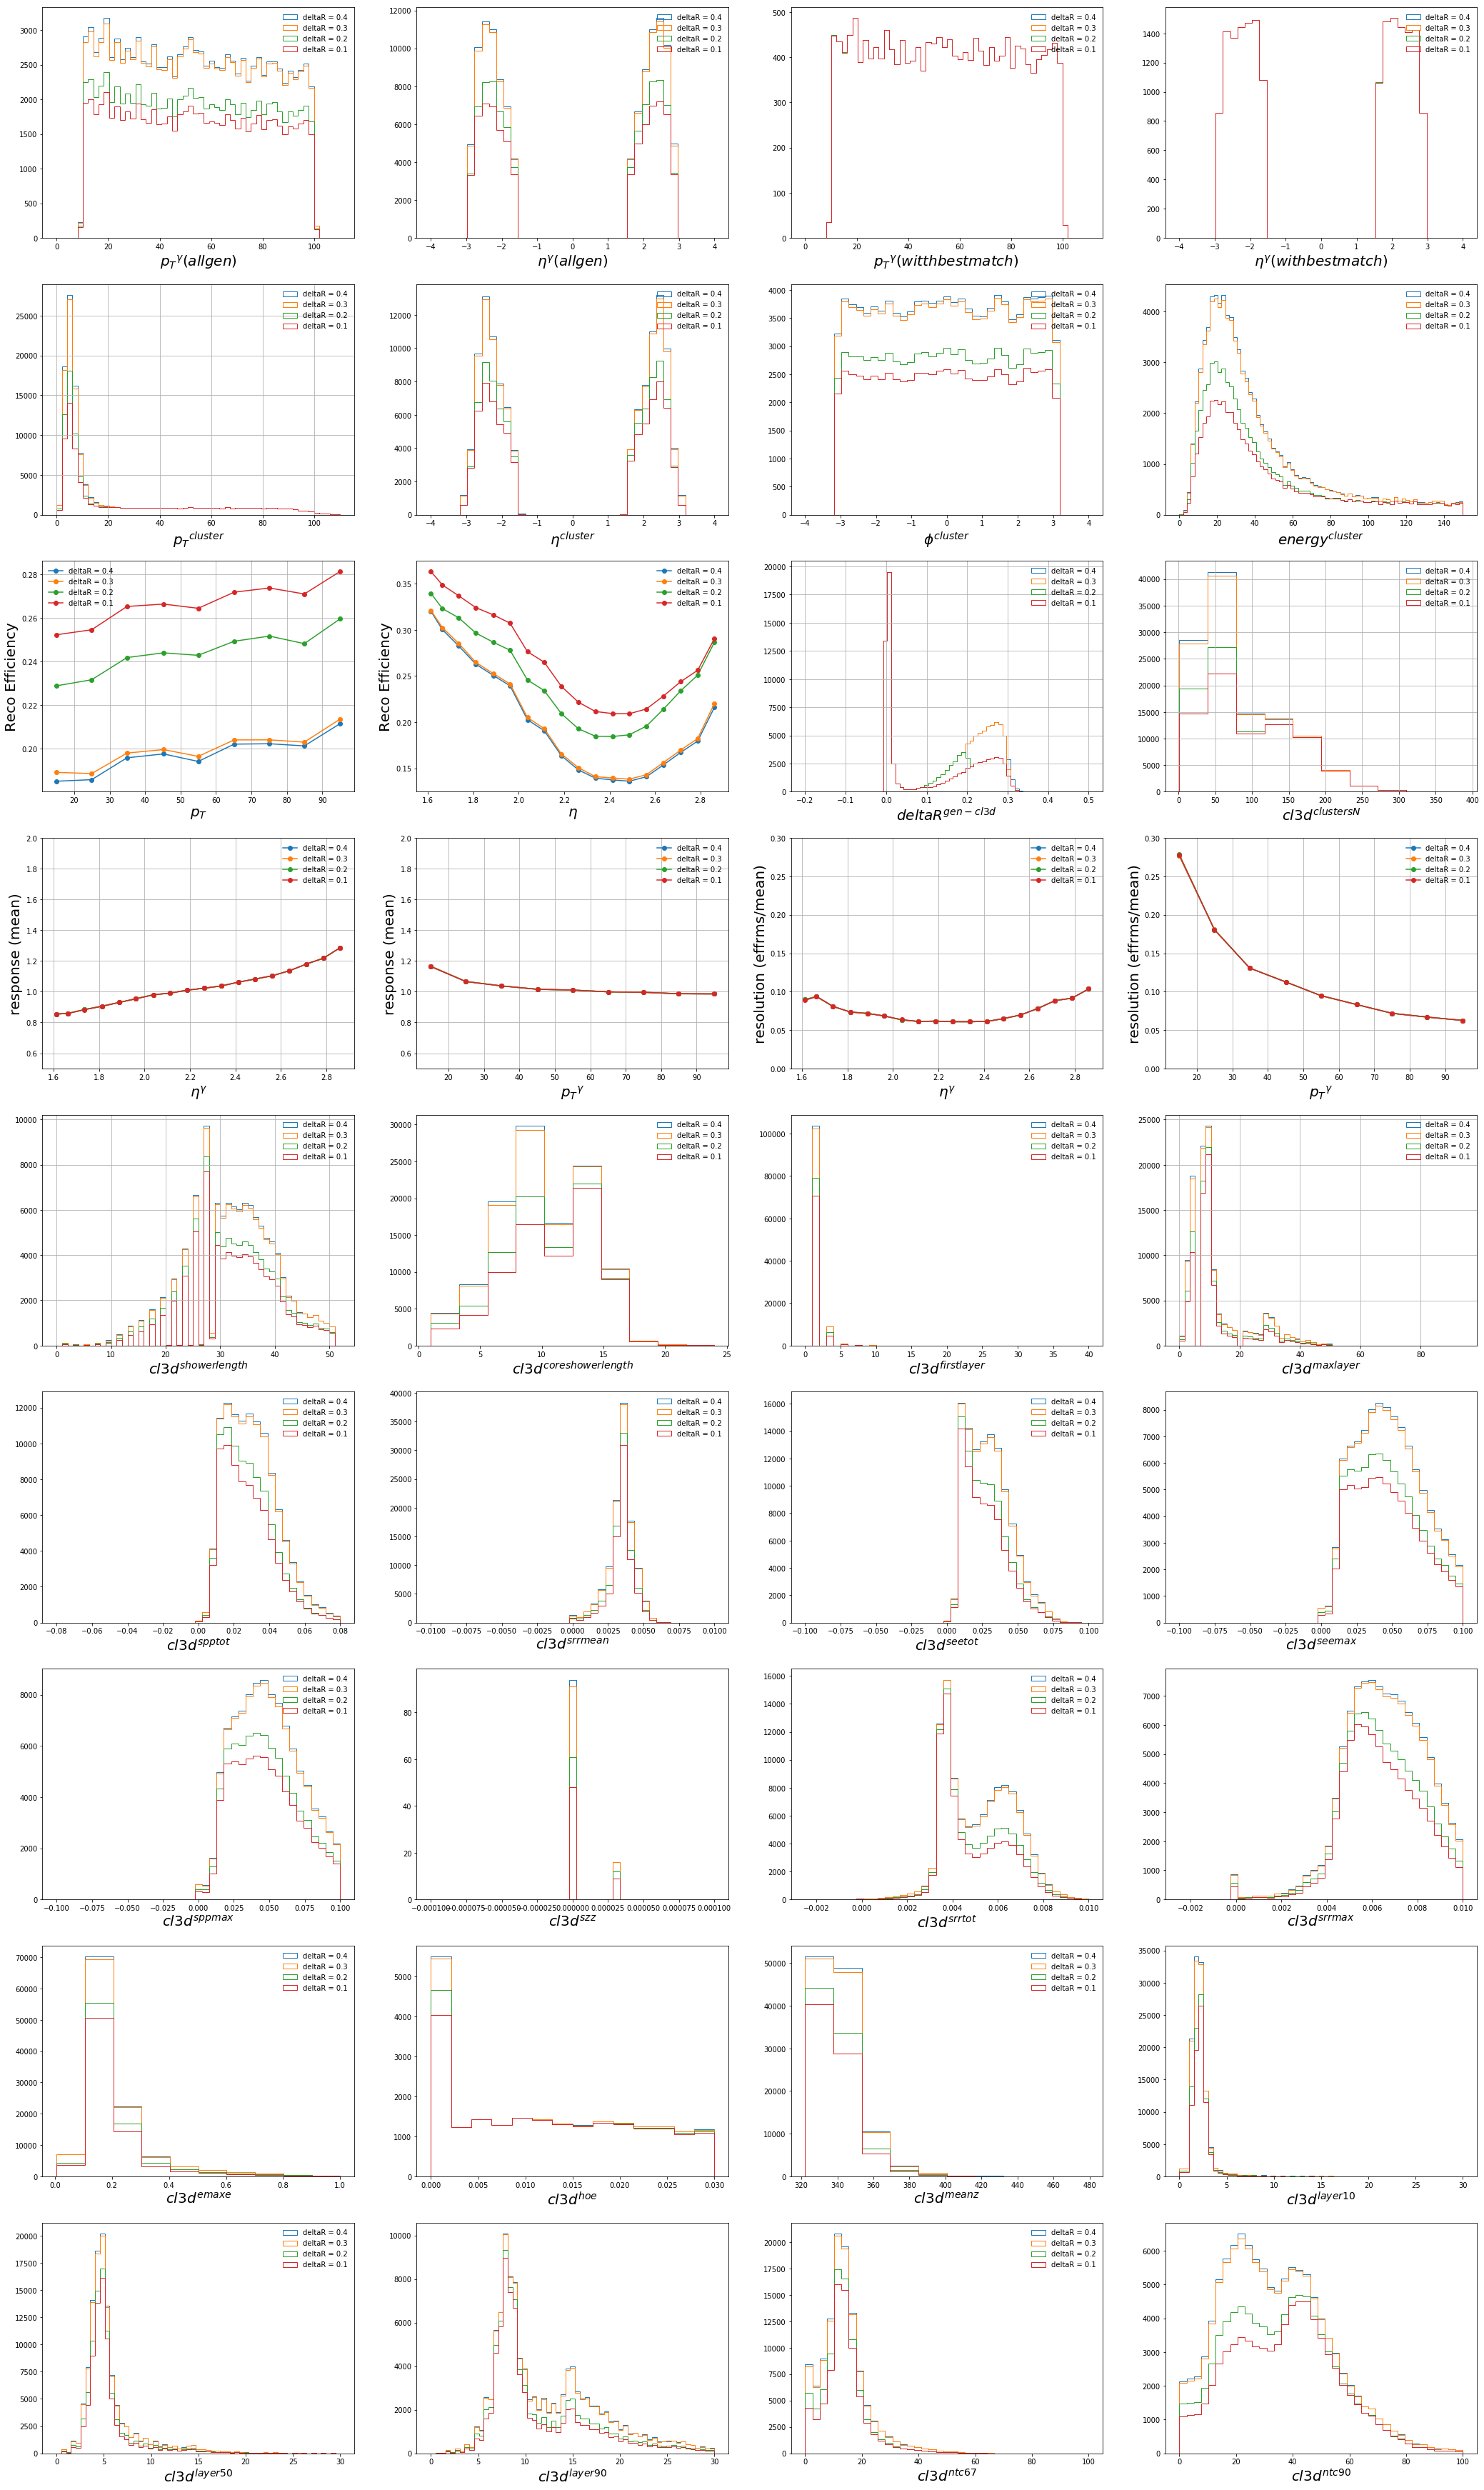

In [10]:
algoSel={}
algogensel={}
for i in algo:
    print(i)
    print(algos[i]) 
    sel = ((algo[i]['matches'] == True))
    algogensel[i] = algo[i][sel]
    sel = ((algogensel[i]['best_match']==True))
    algoSel[i] = algogensel[i][sel]
    layerpt = algo[i]['layer']
    
    algoSel[i]['bineta'] = ((np.abs(algoSel[i]['genpart_eta']) - 1.4)/0.075).astype('int32')
    algoSel[i]['binpt'] = ((algoSel[i]['genpart_pt']- 10.0)/10.0).astype('int32')
    algoSel[i]['abseta'] = np.abs(algoSel[i]['genpart_eta'])
    
    algo_df = algogensel[i].groupby(['event']).apply(lambda x: len(x.genpart_pt))
    algoM_df = algoSel[i].groupby(['event']).apply(lambda x: len(x.genpart_pt))
    algoSel[i]['EffReco'] = algoM_df/algo_df
    df_meanEvent = algoSel[i].groupby(['event']).mean()
    print(algoSel)
    print(df_meanEvent)
    
    df_meanEvent_eta = df_meanEvent.groupby(['bineta']).mean()
    df_meanEvent_pt = df_meanEvent.groupby(['binpt']).mean()
    
    #histpt_gen, bin_edgespt_gen = np.histogram(algogensel[i]['genpart_pt'], bins=np.linspace(0.0,110.0,55))
    #histeta_gen, bin_edgeseta_gen = np.histogram(np.abs(algogensel[i]['genpart_eta']), bins=np.linspace(1.5,3.0,40))
    #histpt_cl, bin_edgespt_cl = np.histogram(algo[i]['cl3d_pt'], bins=np.linspace(0.0,110.0,55))
    #histeta_cl, bin_edgeseta_cl = np.histogram(np.abs(algo[i]['cl3d_eta']), bins=np.linspace(1.5,3.0,40))
    #histpt_clM, bin_edgespt_clM = np.histogram(algoSel[i]['genpart_pt'], bins=np.linspace(0.0,110.0,55))
    #histeta_clM, bin_edgeseta_clM = np.histogram(np.abs(algoSel[i]['genpart_eta']), bins=np.linspace(1.5,3.0,40))
    #ptbins = bin_edgespt_cl[1:]
    #etabins = bin_edgeseta_cl[1:]
    #content_ptM = [0] * (len(histpt_gen))
    #content_etaM = [0] * (len(histeta_gen))
    #for j in range(len(histpt_gen)):
    #    if(histpt_cl[j] > 0):
    #        content_ptM[j] = histpt_clM[j]/histpt_gen[j]
    #for j in range(len(histeta_gen)):
    #    if(histeta_cl[j] > 0):
    #        content_etaM[j] = histeta_clM[j]/histeta_gen[j]
        
    algoSel[i]['res'] = algoSel[i]['cl3d_pt']/algoSel[i]['genpart_pt']
    df_mean_eta = algoSel[i].groupby(['bineta']).mean()
    df_mean_pt = algoSel[i].groupby(['binpt']).mean()
    df_effrms_eta = algoSel[i].groupby(['bineta']).apply(lambda x: rmseff(x.res))
    df_effrms_pt = algoSel[i].groupby(['binpt']).apply(lambda x: rmseff(x.res))
    
    fig = plt.figure(num='performance1',figsize=(36,63))
    plt.subplot(941)
    #plt.plot(ptbins, histpt_gen, linestyle='-',label=algoTitle[i])
    plt.hist(algogensel[i]['genpart_pt'], bins=np.linspace(0.0,110.0,55), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$p{_T}^{\gamma} (all gen)$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(942)
    #plt.plot(ptbins, histpt_clM, linestyle='-',label=algoTitle[i])
    #plt.xlabel('$p{_T}^{\gamma} (matched)$',fontsize=20)
    plt.hist(algogensel[i]['genpart_eta'], bins=np.linspace(-4.0,4.0,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$\eta^\gamma (all gen)$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(943) 
    plt.hist(algoSel[i]['genpart_pt'], bins=np.linspace(0.0,110.0,55), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$p{_T}^{\gamma} (witthbest match)$ ',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(944)
    plt.hist(algoSel[i]['genpart_eta'], bins=np.linspace(-4.0,4.0,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$\eta^\gamma (with best match)$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(945)
    plt.hist(algo[i]['cl3d_pt'], bins=np.linspace(0.0,110.0,55), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$p{_T}^{cluster}$',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(946) 
    plt.hist(algo[i]['cl3d_eta'], bins=np.linspace(-4.0,4.0,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$\eta^{cluster}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(947)  
    plt.hist(algo[i]['cl3d_phi'], bins=np.linspace(-4.0,4.0,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$\phi^{cluster}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(948) 
    plt.hist(algo[i]['cl3d_energy'], bins=np.linspace(0.0,150.0,75), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$energy^{cluster}$',fontsize=20)
    plt.legend(frameon=False)
      
    plt.subplot(949)
    plt.errorbar(df_meanEvent_pt.genpart_pt, df_meanEvent_pt.EffReco, linestyle='-', marker='o',label=algoTitle[i])
    plt.xlabel('$p{_T}$',fontsize=20)
    plt.ylabel('Reco Efficiency',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,10)
    plt.errorbar(df_meanEvent_eta.abseta, df_meanEvent_eta.EffReco, linestyle='-', marker='o',label=algoTitle[i])
    plt.xlabel('$\eta$',fontsize=20)
    plt.ylabel('Reco Efficiency',fontsize=20)
    plt.legend(frameon=False)
    #plt.plot(ptbins, content_ptM, linestyle='-',label=algoTitle[i])
    #plt.xlabel('$p{_T}$',fontsize=20)
    #plt.ylabel('Reco Efficiency',fontsize=20)
    #plt.legend(frameon=False)
    #plt.grid(True)
    #plt.plot(etabins, content_etaM, linestyle='-',label=algoTitle[i])
    #plt.xlabel('$\eta$',fontsize=20)
    #plt.ylabel('Reco Efficiency',fontsize=20)
    #plt.legend(frameon=False)
    #plt.grid(True)
    plt.subplot(9,4,11) 
    plt.hist(algo[i]['deltar'], bins=np.linspace(-0.2,0.5,70), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$deltaR^{gen-cl3d}$',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,12)  
    plt.hist(algo[i]['cl3d_clusters_n'], histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{clustersN}$',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    
    plt.subplot(9,4,13)
    plt.errorbar((df_mean_eta.abseta), df_mean_eta.res, linestyle='-', marker='o', label=algoTitle[i])
    plt.ylim(0.5,2.0)
    plt.xlabel('$\eta^\gamma$',fontsize=20)
    plt.ylabel('response (mean)',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,14)
    plt.errorbar((df_mean_pt.genpart_pt), df_mean_pt.res, linestyle='-', marker='o', label=algoTitle[i])
    plt.ylim(0.5,2.0)
    plt.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt.ylabel('response (mean)',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,15) 
    plt.errorbar((df_mean_eta.abseta), df_effrms_eta/df_mean_eta.res, linestyle='-', marker='o',  label=algoTitle[i])
    plt.ylim(0.0,0.3)
    plt.xlabel('$\eta^\gamma$',fontsize=20)
    plt.ylabel('resolution (effrms/mean)',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,16) 
    plt.errorbar(np.abs(df_mean_pt.genpart_pt), df_effrms_pt/df_mean_pt.res, linestyle='-', marker='o', label=algoTitle[i])
    plt.ylim(0.0,0.3)
    plt.xlabel('$p{_T}^{\gamma}$',fontsize=20)
    plt.ylabel('resolution (effrms/mean)',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    
    plt.subplot(9,4,17) 
    plt.hist(algo[i]['cl3d_showerlength'], bins=np.linspace(0.0,52.0,53), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{showerlength}$',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,18) 
    plt.hist(algo[i]['cl3d_coreshowerlength'], histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{coreshowerlength}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,19)  
    plt.hist(algo[i]['cl3d_firstlayer'], bins=np.linspace(0,40,41), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{firstlayer}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,20) 
    plt.hist(algo[i]['cl3d_maxlayer'], bins=np.linspace(0.0,94.0,55), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{maxlayer}$',fontsize=20)
    plt.legend(frameon=False)
    plt.grid(True)
    plt.subplot(9,4,21) 
    plt.hist(algo[i]['cl3d_spptot'], bins=np.linspace(-0.08,0.08,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{spptot}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,22)  
    plt.hist(algo[i]['cl3d_srrmean'], bins=np.linspace(-0.01,0.01,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{srrmean}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,23) 
    plt.hist(algo[i]['cl3d_seetot'], bins=np.linspace(-0.1,0.1,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{seetot}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,24)  
    plt.hist(algo[i]['cl3d_seemax'], bins=np.linspace(-0.1,0.1,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{seemax}$',fontsize=20) 
    plt.subplot(9,4,25) 
    plt.hist(algo[i]['cl3d_sppmax'], bins=np.linspace(-0.1,0.1,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{sppmax}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,26)  
    plt.hist(algo[i]['cl3d_szz'], bins=np.linspace(-0.0001,0.0001,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{szz}$',fontsize=20)
    plt.subplot(9,4,27) 
    plt.hist(algo[i]['cl3d_srrtot'], bins=np.linspace(-0.0025,0.01,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{srrtot}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,28)  
    plt.hist(algo[i]['cl3d_srrmax'], bins=np.linspace(-0.0025,0.01,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{srrmax}$',fontsize=20)
    plt.subplot(9,4,29) 
    plt.hist(algo[i]['cl3d_emaxe'],histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{emaxe}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,30)  
    plt.hist(algo[i]['cl3d_hoe'], bins=np.linspace(0,0.03,15), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{hoe}$',fontsize=20)
    plt.subplot(9,4,31) 
    plt.hist(algo[i]['cl3d_meanz'], histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{meanz}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,32)  
    plt.hist(algo[i]['cl3d_layer10'], bins=np.linspace(0,30,60), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{layer10}$',fontsize=20)
    plt.subplot(9,4,33) 
    plt.hist(algo[i]['cl3d_layer50'], bins=np.linspace(0,30,60), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{layer50}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,34)  
    plt.hist(algo[i]['cl3d_layer90'], bins=np.linspace(0,30,60), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{layer90}$',fontsize=20)
    plt.subplot(9,4,35) 
    plt.hist(algo[i]['cl3d_ntc67'], bins=np.linspace(0,100,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{ntc67}$',fontsize=20)
    plt.legend(frameon=False)
    plt.subplot(9,4,36)  
    plt.hist(algo[i]['cl3d_ntc90'], bins=np.linspace(0,100,40), histtype='step', linestyle='-',label=algoTitle[i])
    plt.xlabel('$cl3d^{ntc90}$',fontsize=20)
#    if(i == 0):
#        plt.subplot(9,4,32) 
#        plt.hist2d(abs(algo[i]['cl3d_eta'][selpt]),algo[i]['cl3d_pt'][selpt],bins=(40, 70),cmap=plt.cm.Reds,norm=LogNorm(),label="Fixed binning code: p_{T}^{cl3d} < 20 GeV")
#        plt.xlabel('$\eta^{cluster}$',fontsize=20)
#        plt.ylabel('$p{_T}^{cluster}$',fontsize=20)
#        plt.legend(frameon=False,fontsize=20)
        #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',frameon=False, fontsize=20)
#        plt.colorbar()
#    if(i == 1):
#        plt.subplot(9,4,33)        
#        plt.hist2d(abs(algo[i]['cl3d_eta'][selpt]),algo[i]['cl3d_pt'][selpt],bins=(40, 70),cmap=plt.cm.Reds,norm=LogNorm(),label="Eta dependent binning code: p_{T}^{cl3d} < 20 GeV")
#        plt.xlabel('$\eta^{cluster}$',fontsize=20)
#        plt.ylabel('$p{_T}^{cluster}$',fontsize=20)
#        plt.legend(frameon=False,fontsize=20)
        #plt.legend(loc='lower left', bbox_to_anchor=(0.02, 0.02),frameon=False)
#        plt.colorbar()
    plt.savefig('validationElectrons.png') 